## <center>CERTIFICATE IN QUANTITATIVE FINANCE
 
## <center>Jun 2022 Cohort
 
## <center>Assignment 3:  October 2022


## <center> A. Maths



Question 1

Consider MSE($\hat{\beta}$) wrt to the true value $\beta$ in context of regression methods,
$$\mathbb{E}[(\hat{\beta} - \beta)^2] = Var[\hat{\beta}] + (\mathbb{E}[\hat{\beta}] - \beta)^2 $$

Answer below with Yes / No and one sentence of explanation referring to maths

(a) can there exist an estimator with the smaller MSE than minimal least squares?

(b) for a prediction, does the MSE measure an irreducible error or model error?

**Responses:**

(a) Yes.  The Gauss-Markov theorem states that Ordinary Least Squares coeffients represent the Best Linear *Unbiased* Operator:  this model has the lowest sampling variance for all *unbiased* linear estimators; however, a more highly biased model (for instance regularised models such as Lasso) *may* have lower MSE than a similar, less-biased model such as standard Linear regression

(b) MSE measures **model error**.  We assume that a true relationship $Y = f(X) + \epsilon$ exists, where $\epsilon$ has is normally distributed with mean of zero, and represents Irreducible error.  This error only be improved by methods such as better measurement of the dependent variable, or by introduction of additional features in to the feature space.

Question 2 

Gaussian RBF kernel is given as $k(x_i, x_j) = exp(- \frac{||x_i - x_j||^2}{2\sigma})$

Suppose we have three points, $z_1, z_2$ and $x$; where $z_1$ is geometrically very close to $x$ and $z_2$ is geometrically far away from $x$.  What is the value of $k(z_1, x)$ and $k(z_2, x)$?

(a) $k(z_1, x)$ will be close to 1 and $k(z_2, x)$ will be close to 0.

(b) $k(z_1, x)$ will be close to 0 and $k(z_2, x)$ will be close to 1.

**Response:**

This problem is easy to visualise geometrically.  

\- If $z_1$ is geometrically *close to* $x$ then the squared L2 norm $||z_1 - x||^2$ will approach zero.    

\- Thus, $k(z_1, x) = exp(- \frac{||z_1 - x||^2}{2\sigma})$ will approach $e^0 = 1$ in the limit as $z_1 - x$ approaches zero.

\- If $z_2$ is geometrically *far away from* $x$ then $||z_2 - x||^2$ will increase with distance, approaching infinity.  

\- Therefore $k(z_1, x) = exp(- \frac{||z_1 - x||^2}{2\sigma})$ will approach $e^{-\infty} = 0$

Therefore the answer is (a):

*(a) $k(z_1, x)$ will be close to 1 and $k(z_2, x)$ will be close to 0.*



Question 3

Mathematically specify three types of Loss Function for decision trees

Decision trees will recursively split a feature space, to group data items with similar label values together.  

Decision Trees usually use a top-down, 'greedy' algorithm called recursive binary splitting.  

The algorithm is 'greedy' in that each split is done to maximise the quality of that specific split, (rather than, for instance, permitting a less-than-optimal fit in split $m$, only to enable a superior split later in split $m+1$, which could result in a superior tree).  

At each split, the Decision Tree algorithm attempts to minimise the residual sum of squares RSS, or classification error rate $$E = 1-\max_{k}(\hat{p_{mk}})$$

This is done via an impurity, or loss function $H(..)$

For **Classification** problems, the two main candidates for this are **Entropy** and **Gini**.

Let
$$p_{mk} = \frac{1}{n_m} \sum_{y \in Q_m} I(y = k)$$
be the proportion of observations of class $k$ in node $m$.

The **Gini** impurity is defined as:

$$H(Q_m) = \sum{k}p_{mk}  (1-p_{mk})$$

The **Entropy** is defined as: 

$$H(Q_m) = - \sum_k p_{mk} \log(p_{mk})$$

These are often used in conjunction with **Training Error Rate** $\frac{1}{n}\sum_{j = 1}^{n}\mathbb{I}(y_i \neq \hat{y}_i)$, but I view this more as a metric than a Loss Function as such

For **Regression** problems, the most commonly used loss function is Mean Squared Error.  

Let the mean value of any one node $m$ be:

$$\bar{y}_m = \frac{1}{n_m}\sum_{y \in Q_m}y$$

Then the Mean Squared Error is defined as:

$$H(Q_m) = \frac{1}{n_m} \sum_{y \in Q_m} (y - \bar{y}_m)^2$$

Additional loss functions such as Mean Absolute Error or Half Poisson deviance are also available but less widely used.

## <center> B. Models

#### Contents of this section

- Approach and Summary Conclusions

- Preliminaries: common functions and classes

- The 7 Steps to Model Building

- Detailed Workings

1. Understand: Frame the problem and look at the big picture

    1.1 Using the Model to build a trading strategy

    1.2 Expectations and Some Assumptions

    1.3 Some notes on approach and notation

    1.4 Support Vector Machines

    1.5 Choice of Ticker

    1.6 Metrics and Measurements (Accuracy, ROC Curve, AUC, Confusion Matrix, Classification Report)

2. Collect Data

3. Exploratory Data Analysis

4. Clean the Data

5. Transform the Data

    5.1 (Re-)Cleaning timeseries data: Impute, or Drop nulls?

    5.2 Evaluation of label data set balance

    5.3 Feature Selection

    5.3.1 Feature Selection: Manual

    5.3.2 Feature Selection: a More Scientific Approach (SelectKBest, VIF)

    5.3.3 Feature Selection: Conclusions

6. Choose and Train the Model

7. Evaluate and Tune the Model

    7.1 ````predict_proba()```` and its uses

    7.2 The ROC curve and AUC metric

    7.3 Confusion Matrix

    7.4 Classification Report

    7.5 Evaluation of this model

    7.6 Hyperparameter Tuning

    7.6.1 ````GridSearchCV````

    7.6.2 Evaluation of this model

    7.6.3 ````RandomizedSearchCV````

    7.6.4 Evaluation of this model

    7.6.5 ````RandomizedSearchCV````:  Optimising AUC

    7.6.6 Evaluation of this model



#### Approach and Summary Conclusions

**Approach**

In addressing the problem set by this paper, I have used the following approach, which is in line with the seven steps to model building:

- Evaluate the problem and understand approach to addressing it, and which key metrics to use

- Extract the data from Yahoo! Finance API

- Perform Exploratory Data Analysis by visualising the data

- Evaluate if there is any initial Data Cleaning required

- Create the label, 'Sign' by interrogating if Close prices on T+1 are greater or less than Closing Prices on T.  
    - I interpret Sign as the dependent variable, and subsequently move this to the label data set and remove from the feature set.


- Transform the data, by adding an additional feature set as specified in the problem statement (O-C, H-L, Past Returns, Momentum, Simple Moving average, Exponential Moving Average).  
    - I then perform a re-check for empty values, and drop values that are unreliable.  
    - I do this by simply dropping the rows, rather than via use of an ````Imputer```` process, as I believe that is more reliable in this setting.
    - Here, I observe that the label dataset is slightly unbalanced (ratio 52:48).  Given the parameters of this specific problem, I adjudge that the risk to the the model is comparatively low - but this is something that would require attention in any production implementation.
 
- Perform Feature Selection
    - I perform this in different ways: Manually, then by using ````SelectKBest````, and via ````VIF````
    - ````VIF```` proves to be useless in this context, but ````SelectKBest```` identifies a set of 27 best features.

- Using the set of chosen features from ````SelectKBest````, commence to training the model.  
    - For a Support Vector Classifier ````SVC```` model with more-or-less default parameters, I fit against the training data set ````X_train```` and ````y_train````, and perform predictons against the test dataset ````X_test````, creating a set of predictions, ````y_pred````
    - The resultant initial model has a ROC curve & AUC that consistently outperforms a random choice.  Key metrics are as below:

$$ \begin{array}{cccccccc}
Precision & Recall & F1 & AUC \newline
0.50 & 0.90 & 0.65 & 0.55\newline
\end {array} $$

- Tune the model
    - Here I use ````TimeSeriesSplit```` with 5 splits, and both ````GridSearchCV```` and ````RandomizedSearchCV```` - both times, aiming to optimise the $F_1$ metric.  
    - Both of these algorithms identify the same optimal model.
    - This model, again, consistently beats a random choice, as indicated by the ROC Curve and AUC metric.  The model has the below parameters:

$$ \begin{array}{cccccccc}
Kernel & \gamma & C & coef0 \newline
RBF & 1000 & 10^{-7} & 0 \newline
\end {array} $$

- This model increases the Precision, Recall and F1 for the Positive Class to the below.  Clearly, these are modest improvements - but F1 has increased from 0.65 to 0.66 as required, with the impact being a small reduction in Precision (-0.01) and AUC (-0.01).

$$ \begin{array}{cccccccc}
Precision & Recall & F1 & AUC \newline
0.49 & 1.00 & 0.66 & 0.54 \newline
\end {array} $$

- One notable concern I have with this tuned model is that it appears to *always* predict an up move, on the data available in the test set ````X_test````.  Given that our main focus is on predicting up moves, this is less of a concern for this specific problem:  but this would be an sizeable issue for a model that attempted to accurately predict both up and down moves, and would likely be a blocker to adoption  in the real world.

- I finally perform the tuning approach with ````RandomizedSearchCV```` but this time with an attempt to optimise for AUC, rather than F1.   This resulted in a model that was largely consistent with what was found above, with an AUC of 0.54

The best model identified was that identified by ````RandomizedSearchCV```` and ````GridSearchCV```` as below:

$$ \begin{array}{cccccccc}
Kernel & \gamma & C & coef0 \newline
RBF & 1000 & 10^{-7} & 0 \newline
\end {array} $$

with key performance metrics:

$$ \begin{array}{cccccccc}
Precision & Recall & F1 & AUC \newline
0.49 & 1.00 & 0.66 & 0.54 \newline
\end {array} $$

**Conclusions**

*"It takes 6 months to create a proper machine learning model" - Kannan S, M4L4*

Going in to this exercise, my expectations on how successful a ML predictive model would be were not high.  It is clear from the problem statement that the toolset available to us would come "without expectation of predictive powers", and I have found this to be justified.

Given a Markov process that formally is assumed to exhibit the martingale property at short timescales, it should be tremendously difficult to accurately predict T+1 movements in the process.  Given that our choice of features are primarily those that take a number of historical days' data and perform a simple calculation on them (Moving Average, Momentum), the findings from this paper are largely consistent with this prediction.

One of the key decisions in this paper has been to decide how to populate the label dataset, i.e. when to decide if we should categorise the stock as having gone down, or up.  Here, I opted for a straightforward approach, where if the Closing price for T+1 was greater than that for that of T, it counts as an 'up' move.  

I found that the success or failure of the model was very sensitive to this choice:

- If I permitted an 'up' move to encompass the scenario where T+1's price is >= 99.5% of T's price, accuracy scores and AUC values went through the roof.  It would have been easy to 'game the numbers' here, by choosing this strategy, but I don't feel that it is representative of a valid business use case.

- Similarly, when I slightly penalised 'up' moves - for instance, categorising an up move of 0.25% as a 'down' move instead - it had a significant negative impact on all metrics.  This, to my mind is much more of a real-life scenario.

I also checked the Confusion Matrices for each model.  In both models that resulted from the hyperparameter tuning phase (at least when used to predict data on the ````X_test```` dataset) always predicted an 'up' move.  This is clearly a sizeable issue for the models under discussion.  I cannot in all good conscience recommend either of these models, considering that (when taking in to account Positive class predictions) they are wrong more often than they are right - at least with regards to the test dataset in this experiment.

The problem was framed specifically with regards to predicting up moves of the stock, not with regards to defining a trading strategy, nor with regards to predicting the up and down moves.  My choice of key metric (F1) here reflects that.  However, I would argue that a more balanced metric for most scenarios would be the ROC curve & AUC, as it gives a much more holistic view of the model's performance

In summary, I will confess to being rather underwhelmed by the success of my models - and sadly, easy conclusions have proven evasive.  I have also found that the improvements in the model during the hyperparameter tuning phase were modest.

One thing that the model *has* demonstrated however, is that on a statistical basis, it should be possible to (under idealised constraints) to build a model that would beat a random choice *on a statistical basis*

#### Preliminaries

First things first, we need to get some preliminaries out of the way.  Here, I do most of the core imports, define some useful helper functions, define some enumerations and check to make sure we have an appropriate directory structure in place.  

This section is not very interesting - but I'm leaving it here so that the notebook works correctly if you run each cell from start to finish.

In [1]:
##############################################################################
# Imports, parameters etc
##############################################################################

# Core python stuff
import numpy as np
import pandas as pd
import os

# Extracting data
import yfinance as yf

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('fivethirtyeight')

# Models
from sklearn.svm import SVC

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, \
    RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, \
    TimeSeriesSplit, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer

# Pipelines, Feature Union
from sklearn.pipeline import Pipeline, FeatureUnion

# Metrics
from sklearn.metrics import accuracy_score, classification_report, \
    confusion_matrix, plot_confusion_matrix, auc, roc_curve, plot_roc_curve, \
    roc_auc_score

# Feature selection
from sklearn.feature_selection import f_classif, SelectKBest
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFECV, RFE
# import shap

# IDE settings
pd.options.display.max_columns = None   # show all columns
# pd.options.display.max_rows = None    # show all rows (not recommended)

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

##############################################################################
# Common functions
##############################################################################

# just a little logging function
def logme(contents):
    print('*** ', contents)

def show_pic(location):
    # Nothing to see here.  Using VSCode, it's not possible to embed images 
    # direct in to a notebook cell so this is a snippet of code to do that.
    plt.figure(figsize =(20, 10))
    image = mpimg.imread(location)
    fig = plt.imshow(image)
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

##############################################################################
# Constants, enumerations etc
##############################################################################

logme(f'Initiating frequently-used variables...')
TICKER = 'TWTR'                     # Which Ticker to use
TICKER_IS_EQUITY = True             # Use this to flag equity / non-equity tickers
TICKER_START_DATE = '2017-01-01'    # Date from which to extract data (to today)

# Set this to false if you want to re-download data every time
USE_LOCAL_DATA = True

DATA_FILE_NAME = TICKER + '.csv'
DATA_FILE_LOC = './data/'
DATA_FILE = DATA_FILE_LOC + DATA_FILE_NAME
logme(f'Local Data File is at location: {DATA_FILE}')

# What's our tolerance for what's an up vs. a down move?
# 0.995 means we interpret any move that's DOWN 0.5% as an UP move, for instance.
# -0.0025 means a .25% UP move would be considered a DOWN move.
UPDOWN_TOLERANCE = 1.0

# a little helper variable, so that if you run the notebook out of order
# you don't unnecessarily drop & recreate the new features.
NEW_FEATURES_CREATED = False

##############################################################################
# Sanity checks, set up, etc
##############################################################################

# Make sure we have a suitable directory setup
logme(f'Checking if local data directory {DATA_FILE_LOC} exists...')
if (os.path.isdir(DATA_FILE_LOC) == False):
    logme('Data directory doesn\'t exist.  Creating...')
    os.makedirs('./data', exist_ok=True)
else:
    logme(f'Data directory {DATA_FILE_LOC} exists!')

# Check that the chosen ticker has market cap < 100bln usd (for Equities only)
if (TICKER_IS_EQUITY == True):
    logme(f'Checking market cap for {TICKER} with Yahoo! Finance')
    
    # Assume that Market Cap will always be in USD, meaning no need to FX
    t = yf.Ticker(TICKER)
    mc = t.info['marketCap']
    
    # I'd rather use exceptions here, but this isn't a python test.
    if (mc >= 100_000_000_000):
        logme(f"Sorry, only equities with a market cap of < 100 bln are allowed.'\
            '  {TICKER}\'s Market Cap is {mc:,} - please find another ticker")


def get_data_from_yf(save_to_file = False):
    df = yf.download(TICKER, TICKER_START_DATE, progress=True)

    logme(f'Extracted {TICKER} data from start date {TICKER_START_DATE} with shape: {df.shape}')

    if ( save_to_file == True):
        logme(f'Saving data locally to {DATA_FILE}')
        df.to_csv(DATA_FILE)

    return df

***  Initiating frequently-used variables...
***  Local Data File is at location: ./data/TWTR.csv
***  Checking if local data directory ./data/ exists...
***  Data directory ./data/ exists!
***  Checking market cap for TWTR with Yahoo! Finance


I first create a CQFClassifier class.  The job of this class is to automate some of the drudge work around storing feature and label data, splitting training and testing data to minimise data leakage.  It also provides a ```fit_predict()``` method that both fits the model to the provided training data, predicts the test set and returns a set of y predictions (```y_pred```) and a fitted pipe.

In [2]:
class CQFClassifier:

    def __init__(self, X, y, testsize):

        # Note that this class expects the feature & label data to be class members
        # but the Pipeline is not, so you must pass it in any time you want to use it
        # Ditto any predictions made by the model

        self.X = X
        self.y = y
        self.testsize = testsize

        logme(f'Populated full size feature and label sets.  Shapes: \nX:\t\t{X.shape}, \ny:\t\t{y.shape}')

        # note - important that shuffle = False, as we are using timeseries data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size = self.testsize, random_state = 42, shuffle=False
        )

        logme(f'Created training & testing datasets.  Shapes of the dataframes are:\nX_train:\t{self.X_train.shape}\nX_test:\t\t{self.X_test.shape}\ny_train:\t{self.y_train.shape}\ny_test:\t\t{self.y_test.shape}')

    def __str__(self):
        return(f'Classifier {self.__class__}'\
        f'\n\nFeature set size: \t\t{self.X.shape}'\
        f'\nLabel set size: \t\t{self.y.shape}' \
        f'\nLabel set size: \t\t{self.testsize}' \
        f'\n\nX_train: \t\t\t{self.X_train.shape}'
        f'\nX_test: \t\t\t{self.X_test.shape}'
        f'\ny_train: \t\t\t{self.y_train.shape}'
        f'\ny_test: \t\t\t{self.y_test.shape}'  \
        f'\nFeature column list: {self.X.columns}' 
        )

    def fit_predict(self, pipe):

        # fit the model:
        logme('Fitting model using X_train and y_train...')
        pipe.fit(self.X_train, self.y_train)

        # Predict labels for the test set:
        logme('Predicting using X_test')
        y_pred = pipe.predict(self.X_test)

        # return data
        return y_pred, pipe

    def get_metrics(self, pipe, y_pred):
        logme(f'Evaluating training & testing metrics for pipeline: {pipe}')
        
        r2train = accuracy_score(self.y_train, pipe.predict(self.X_train)).round(4)
        r2test = accuracy_score(self.y_test, y_pred).round(4)

        logme(f'Scores:\nTraining score:\t\t{r2train}\nTesting score:\t\t{r2test}')

        return r2train, r2test

    def print_roc_curve(self, pipe):        
        # random prediction
        r_prob = [0 for _ in range(len(self.y_test))]
        r_fpr, r_tpr, _ = roc_curve(self.y_test, r_prob, pos_label=1)

        plot_roc_curve(pipe, self.X_test, self.y_test)
        plt.plot(r_fpr, r_tpr, linestyle='dashed', label='Random prediction')
        plt.title('ROC for Up Moves')
        plt.legend(loc=9)
        plt.show()
        

#### The 7 Steps to Model Building

Here, we will follow the seven steps to model building:
1. Understand:  Frame the problem and look at the big picture; define objectives
2. Collect Data
3. Exploratory Data Analysis and Visualisation:  Explore the data to gain valuable insights
4. Clean the Data
5. Transform the Data
6. Choose and Train Model
7. Validate and Tune Model


#### <center> 1. Understand:  Frame the problem and look at the big picture

Here we have been asked to use **Support Vector Machines** in order to predict **positive** moves of a chosen stock.  My goal here will be to use the available timeseries data in order to form a prediction of if the stock will go up or down (with an emphasis on the up) on T+1.

Prediction frequency:  Daily

My approach will be to form the features that are presented in the exam question (O-C, H-L, Sign, Past/Lagged Returns, Momentum, Simple Moving Average, Exponential Moving Average).  For such features as require a 'lag' parameter (Lagged Returns, Momentum, etc), I have opted for the following values: 1, 2, 3, 4, 5, 10 and 20 days.

Note that we have been explicitly requested to predict *up* moves of the stock:  this may colour some of our decisions later, such as how much importance we put on True Positives vs. True Negatives in the Validation & Tuning section.

I interpret this as a **Classification** problem, rather than as a regression problem.  We will briefly review the the model's ```predict_proba()``` function, which might allow additional insights, however - in which context we can view it as a regression problem in probability space.

We have also been instructed to use Support Vector Machines, so will be primarily using the ```sklearn.svm.SVC``` model.

The problem as posed in the assignment explicitly instructs us to use the following metrics for measurement of the suitability of candidate models: Area under ROC curve; Confusion Matrix; Classification Report.  Of these, my key metric will be $F_1$ for the Positive (1) class

Additionally, for quickly comparing the properties of two models, I will use ```accuracy_score```, in the knowledge that it can be misleading in some contexts and should not be viewed as a definitive metric for the model.  Here, we will use it mainly to quantify if a model is significantly over-fit or not.

The choice of how to decide how to categorise an 'up' vs. a 'down' move is left to us.  Here, I will decide this based on using the Closing prices of T and T+1.  I introduce the condept of "```UPDOWN_TOLERANCE```" which allows us to, for instance, penalise small up moves by counting them as a 'down' move, or vice versa.  For the moment, I shall leave this as 1.0, meaning we count a move as 'up' if and only if the subsequent day's closing price is greater than the previous day's.  This would be trivial to tweak.  The model is highly sensitive to this choice - minor changes to this strategy can result in significant improvements or degradations to the model's performance.

**1.1 Using the model to build a trading strategy**

We have not been requested to build or suggest a trading strategy based on this model, but once we have an output showing a prediction on if the market will go up or down, this would be the obvious next step.  

One could simply use the predictions as-is, or perhaps decide the magnitude of any future trades based on the classifier's ```predict_proba()``` function.  One could also use the calcaultion threshold to enable greater flexibility to factor in investor risk appetite: a cautious investor coule perhaps only invest when ```predict_proba()``` > 0.8, a more bullish investor could invest when ```predict_proba()``` > 0.3...

**1.2 Expectations, and some assumptions**

It is hardly necessary to note that the model outlined in this paper is a toy model and is based on numerous idealised assumptions, such as lack of transaction charges and suchlike.  In any industrial implementation, one would require a thorough evaluation of each of these assumptions - however this is outside the scope of this paper.

In terms of model expectations, we know that stock price prediction is a tremendously difficult exercise:  movements themselves are almost entirely unpredictable.  As such, realistically, we cannot count on a model that is more than fractionally better than randomnesss

In other words, if it was easy to predict if stocks would go up or down tomorrow, everyone would be doing it.


**1.3 Some notes on approach and notation:**

I am conscious that this is neither primarily a programming assignment, nor a python one.  As such, in my design I have chosen to err on the side of code readability rather than optimising for efficiency, scalability, reusability or genericness.

In the first few sections, we refer to the set of feature & label data as ```tickerdata``` for clarity.  Once we actually start manipulating the data, we revert to the more conventional ```X```, ```y``` etc.

**1.4 Support Vector Machines**

Support Vector Machines is a popular grouping of Machine Learning models.  In summary, they work by partitioning data samples in n-dimensional feature space by the use of hyperplanes - so for a classification problem, data samples on one side of the hyperplane are predicted to be in one category, samples on the other side are predicted to be in another category.

SVMs support both 'hard margin' and 'soft margin' approaches.  Hard margin approaches expect data samples to be neatly separable by the hyperplane.  Soft Margin approaches permit some level of encroachment of data samples in to the 'wrong' region.

For more complex data sets, the 'kernel trick' permits SVMs to flexibly categorise complex, nonlinear data, by virtually projecting samples in to a higher dimension, without the creation of additional features.  Here, I will experiment with the main types of kernel: Gaussian RBF, Sigmoidal, Linear and Polynomial, as well as the main configuration parameters for each type.

**Number of Features**

For many ML models, particularly those with a comparatively small population of training & testing data such as this, one would hesitate to include too many features due to the curse of dimensionality.  Support Vector Machines however are well known as working well in high-dimensional space.  As such, with ~5 years of trading data, I would be comfortable with a set of features numbering approximately 25 in total


**1.5 Choice of Ticker**
We have been given the flexibility to choose which ticker to use.  I wanted to use stocks rather than ETFs or Crypto.  I evaluated numerous options:

- Ebay - a mature tech company with lots of available timeseries data
- Spotify - a good option, but sadly with too little timeseries data available
- EA Games - good contender, plenty of timeseries data
- Uber - my first choice, but it sadly has only approx three years of available timeseries data

In the end, I opted for Twitter (TWTR), mostly as it seemed a little topical due to the recent news coverage.



**1.6 Metrics and Measurements**

While measurement of the quality of a model in a Regression setting can be comparatively straightfoward, in a Classification setting it is much more nuanced.  Here, I present the set of metrics which I will use in this paper for understanding and evaluating how good my models are:

i) Accuracy

Accuracy presents the total number of 'correct' predictions from the model, as a proportion of all predictions made by the model.  

$$Accuracy = \frac{Correct \space Predictions}{Total \space Predictions} $$

Accuracy can be a useful metric, particularly when you want to quickly compare two models against each other, but in skewed datasets it comes with significant risks.

For example, consider a model to identify handwritten numbers.  Any one number -- say, 8 -- is likely to represent approximately 10% of the total population, making some common-sense assumptions about the distribution of the population.  As such, if a model does nothing but predict that any number is *not* an 8, the model will automatically get approximately 90% accuracy.

The model presented in this paper *is* skewed, but not as badly as the previous example.  As such, when we use Accuracy, we do so with caution.



ii) Receiver Operating Characteristic (ROC) curve and Area Under ROC Curve (AUC)

The ROC Curve plots the *True Positive Rate* (TPR) on the y-axis against the *False Positive Rate* (FPR) on the x-axis.  As such, it provides a useful, visual representation of model performance.  In this paper, I present it alongside a representation of what a truly 'random' set of choices, such as a coin-toss experiment, looks like.  Any model that is above this line can be viewed as beating a coin-toss experiment.

The ROC curve has many similarities to the precision-recall curve.  However, I find that it provides a more balanced view of the overall model performance.

Area Under Curve presents the proportion of the chart that is underneath the ROC curve.  A 'perfect' model would have an AUC value of 1.0.  A coin-toss experiment (also shown in red dashed lines) would be in the region of 0.5, i.e. 50% probability of a correct prediction



iii) Confusion Matrix

In a binary classification setting, this presents the number of True Positives & True Negatives (correctly identified instances of the positive / negative class), as well as the number of False Positives (aka Type 1 errors) & False Negatives (aka Type 2 errors)

These will be named TP, TN, FP, FN for the remainder of this paper.

Three critical numbers can be computed from the Confusion Matrix:  Precision, Recall, and F1.

**Precision** measures the proportion of identifications of the Positive Class that were actually correct

$$Precision = \frac{TP}{TP + FP}$$

This is normally used in conjunction with Recall:

**Recall** measures the proportion of actual positives that was correctly identified.

$$Recall = \frac{TP}{TP + FN}$$

Because there is a trade-off betweeen both of these measurements, it is often convenient to measure $F_1$ instead:

**$F_1$** is the harmonic mean of Precision and Recall.  When both Precision and Recall are both high, we will see a high $F_1$ score:

$$F_1 = 2 \times \frac{precision \times recall} {precision + recall} = \frac{TP}{TP + \frac{FN +  FP}{2}}$$

Going forward, my main goal will be to maximise the $F_1$ measurement, specifically with regard to the Positive Class (1).  Coincidentally this also means maximising both Precision and Recall, again for the Positive Class

iv) Classification Report

The classification report summarises many of the numbers derived from the Confusion Matrix, above, for each of the Positive (1) and Negative (0) class.  

The three key values that I will be attempting to optimise are:

- Precision
- Recall
- F1

...all for the Positive (1) class.

#### <center> 2. Collect Data

Here, I use Yahoo! Finance to extract ticker data (Open, High, Low, Close, Adj Close and Volume) as it provides a trivial to use interface that is well integrated to the python ecosystem.

It's important to note here that for the next few sections we will be looking at the entire dataset.  This may be interpreted by some as 'data leakage', however I adjudge the risk to be low.  It would be trivial to implement the below simply using the ```X_test``` dataset, which will be created shortly

In [3]:
# Now extract data for the Ticker

tickerdata = pd.DataFrame()

if (USE_LOCAL_DATA == True and os.path.isfile(DATA_FILE)):
    logme(f'Collecting data from local cache: {DATA_FILE}')
    tickerdata = pd.read_csv(DATA_FILE, index_col='Date')
else:
    logme(f'Collecting data from yfinance:')
    tickerdata = get_data_from_yf(save_to_file = True)

if (tickerdata.empty):
    # For whatever reason we don't have data.  Just get it from yahoo regardless
    logme('ERROR!  Something went wrong:  data is empty.  Collecting from yfinance')
    tickerdata = get_data_from_yf(save_to_file = True)

logme(f'A few lines of {DATA_FILE} are presented below:')

tickerdata.tail()

***  Collecting data from local cache: ./data/TWTR.csv
***  A few lines of ./data/TWTR.csv are presented below:


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-21,50.000000,50.750000,49.549999,49.889999,49.889999,51209029
2022-10-24,50.709999,51.860001,50.520000,51.520000,51.520000,22987553
2022-10-25,52.415001,53.180000,52.200001,52.779999,52.779999,35077848
2022-10-26,52.950001,53.500000,52.770000,53.349998,53.349998,28064973
2022-10-27,53.910000,54.000000,53.700001,53.700001,53.700001,136345128


#### <center> 3. Exploratory Data Analysis

Here, we begin to look at the data in earnest.  First, a colour-coded OHLC chart to give us a flavour of the data:

In [4]:
# I don't normally use cufflinks, but it's just so easy to create a candlestick chart...
import cufflinks as cf
cf.set_config_file(offline=True)

def plot_candlestick_chart(tickerdata):
    tickerdata[:].iplot(kind='ohlc', title = f'{TICKER} Candlestick chart')

plot_candlestick_chart(tickerdata)

#### <center> 4. Clean the Data

We now move on to cleaning the input data.  Luckily, as the data comes from a reliable data source (yahoo finance) there is very little to do.  We firstly check the distribution of the data for anomalies:

In [5]:
tickerdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1466.0,3.731422e+01,1.404679e+01,14.30,2.921000e+01,3.555000e+01,4.406500e+01,7.836000e+01
High,1466.0,3.800233e+01,1.428750e+01,14.40,2.979750e+01,3.626000e+01,4.477125e+01,8.075000e+01
Low,1466.0,3.664276e+01,1.377072e+01,14.12,2.873250e+01,3.487250e+01,4.321750e+01,7.605000e+01
Close,1466.0,3.731677e+01,1.401717e+01,14.29,2.922750e+01,3.564500e+01,4.405000e+01,7.763000e+01
Adj Close,1466.0,3.731677e+01,1.401717e+01,14.29,2.922750e+01,3.564500e+01,4.405000e+01,7.763000e+01
Volume,1466.0,2.088334e+07,2.022084e+07,0.00,1.144394e+07,1.582667e+07,2.264077e+07,2.692131e+08


These variables are largely distributed as one would expect.  I suggest that this means a ```StandardScaler``` and / or ```MinMaxScaler``` would be entirely appropriate here.

Secondly, we check for nulls.  Given that the data originates from a reliable data source, there are no null values, as expected.

In [6]:
tickerdata.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Luckily, our data is comparatively clean, and doesn't require any significant intervention.

#### <center> 5. Transform the Data

Here, we add numerous new features to the dataset, in the hope that they will be useful to the model.  These are as follows:

$$ \begin{array}{cccccccc}
Feature & Formula & Description\ \newline
O-C & Open - Close & Intraday \space price\space  range & \newline
H-L & High - Low & Intraday \space price\space  range & \newline
Sign & [0, 1] & Sign \space of \space Return & \newline
Lagged \space Returns & r_{t-i} & Lagged \space Returns & \newline
Momentum & P_t - P_i & Price \space Change\space  over\space  period \space i & \newline
Simple \space Moving \space Average & \sum_{i = 0}^{n-1} P_{t_i} & Simple \space i-day \space moving\space  average & \newline
Exponential\space  Moving\space  Average & EMA_{t-1} + \alpha[P_t - EMA_{t-1}] & Exponential\space  i - day \space moving \space average & \newline
\end {array} $$

where:

$$i \in [1, 2, 3, 4, 5, 10, 20]$$

If I were to be choosing the feature set myself, I would consider adding the distance of today's price against $i$-day moving average.  This would perhaps indicate if the ticker was trading above or below an historic average value, which could be useful in the presence of any mean-reverting processes.

Sadly this is outside the scope of this paper.

I'm also a little cautious about using 'smoothing' calculations such as Simple and Exponential Moving Average.  In this exercise, it seems important to me to emphasise the 'peakiness' of the timeseries data, rather than suppress it - but we shall see what the models make of the data set available.  I anticipate that EMA would be more useful than SMA, as it can move much more quickly and is more sensitive to recent movements.

In [7]:
# First, check if we've already created the new features, and warn if so
# Not a major issue as Pandas will just overwrite anyway
if (NEW_FEATURES_CREATED == True):
    logme('It looks like some of the new features have already been created.  Are you sure you want to continue?')

In [8]:
def augment_tickerdata(tickerdata):

    NEW_FEATURES_CREATED = True

    # 1. Open - Close & High - Low
    logme(f'Adding Open-Close and High-Low...')
    tickerdata['O-C'] = tickerdata['Open'] - tickerdata['Close']
    tickerdata['H-L'] = tickerdata['High'] - tickerdata['Low']

    # 2. Logreturn
    logme('Creating (log) Return')
    tickerdata['LogReturn'] = np.log(tickerdata['Close']).diff()

    # 3. Sign
    logme(f'Creating Sign...  UPDOWN_TOLERANCE = {UPDOWN_TOLERANCE}')
    tickerdata['Sign'] = np.where(
        tickerdata['Close'].shift(-1) > UPDOWN_TOLERANCE * tickerdata['Close'], 1, 0
    )

    # day-lag list for use in support of Lagged return, Momentum, SMA, EMA
    daylaglist = [1, 2, 3, 4, 5, 10, 20]

    # 4. Lagged returns
    logme('Creating lagged returns')
    for i in daylaglist:
        tickerdata['Ret_'+str(i)] = np.log(tickerdata['Close']).diff(i) 

    # 5. Momentum
    logme('Creating Momentum...')
    for i in daylaglist:
        tickerdata['Momentum_'+str(i)] = tickerdata['Close'] - tickerdata['Close'].shift(i) 

    # 6. Simple Moving Average
    logme('Creating Simple Moving Average')
    for i in daylaglist:
        tickerdata['SMA_'+str(i)] = tickerdata['Close'].rolling(i).sum()

    # 7. Exponential Moving Average
    logme('Creating Exponential Moving Average')
    for i in daylaglist:
        a = 2 / (i + 1)
        tickerdata['EMA_'+str(i)] = tickerdata['Close'].ewm(alpha = a).mean() # <---check!!!
    
    return tickerdata

tickerdata = augment_tickerdata(tickerdata)

***  Adding Open-Close and High-Low...
***  Creating (log) Return
***  Creating Sign...  UPDOWN_TOLERANCE = 1.0
***  Creating lagged returns
***  Creating Momentum...
***  Creating Simple Moving Average
***  Creating Exponential Moving Average


In [9]:
logme('All additional features created.  Our tickerdata now looks like:')
tickerdata.tail()


***  All additional features created.  Our tickerdata now looks like:


,Open,High,Low,Close,Adj Close,Volume,O-C,H-L,LogReturn,Sign,Ret_1,Ret_2,Ret_3,Ret_4,Ret_5,Ret_10,Ret_20,Momentum_1,Momentum_2,Momentum_3,Momentum_4,Momentum_5,Momentum_10,Momentum_20,SMA_1,SMA_2,SMA_3,SMA_4,SMA_5,SMA_10,SMA_20,EMA_1,EMA_2,EMA_3,EMA_4,EMA_5,EMA_10,EMA_20
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-10-21,50.000000,50.750000,49.549999,49.889999,49.889999,51209029,0.110001,1.200001,-0.049849,1,-0.049849,-0.038149,-0.037183,-0.016894,-0.011162,0.014334,0.182201,-2.549999,-1.940002,-1.889999,-0.850002,-0.560001,0.709999,8.309998,49.889999,102.329998,154.160000,205.939999,256.680000,507.840000,965.690002,49.889999,50.656021,50.927363,51.012562,51.008647,50.420205,48.635329
2022-10-24,50.709999,51.860001,50.520000,51.520000,51.520000,22987553,-0.810001,1.340000,0.032150,1,0.032150,-0.017700,-0.005999,-0.005034,0.015256,0.022773,0.215795,1.630001,-0.919998,-0.310001,-0.259998,0.779999,1.160000,10.000000,51.520000,101.410000,153.849998,205.680000,257.459999,509.000000,975.690002,51.520000,51.232007,51.223682,51.215537,51.179098,50.620168,48.910060
2022-10-25,52.415001,53.180000,52.200001,52.779999,52.779999,35077848,-0.364998,0.980000,0.024162,1,0.024162,0.056312,0.006463,0.018163,0.019128,0.052710,0.226322,1.259998,2.889999,0.340000,0.949997,1.000000,2.709999,10.689999,52.779999,104.299999,154.189999,206.629997,258.459999,511.709999,986.380001,52.779999,52.264002,52.001840,51.841322,51.712731,51.012865,49.278625
2022-10-26,52.950001,53.500000,52.770000,53.349998,53.349998,28064973,-0.399998,0.730000,0.010742,1,0.010742,0.034904,0.067053,0.017204,0.028905,0.066052,0.209877,0.570000,1.829998,3.459999,0.910000,1.519997,3.410000,10.099998,53.349998,106.129997,157.649998,207.539997,259.979996,515.119999,996.480000,53.349998,52.988000,52.675919,52.444792,52.258487,51.437798,49.666375
2022-10-27,53.910000,54.000000,53.700001,53.700001,53.700001,136345128,0.209999,0.299999,0.006539,0,0.006539,0.017281,0.041443,0.073592,0.023743,0.064613,0.228278,0.350002,0.920002,2.180000,3.810001,1.260002,3.360001,10.959999,53.700001,107.049999,159.829998,211.349998,261.239998,518.480000,1007.439999,53.700001,53.462667,53.187960,52.946876,52.738992,51.849108,50.050530


**5.1 (Re-) cleaning timeseries data: Impute, or Drop nulls?**

While in the previous section there was no significant requirement for data cleaning, it *is* required here.  

Numerous features use data from up to 20 historic trading days - meaning that the calculation cannot be relied upon near the start of the data set (or, in the case of Sign, which uses a future view, the end of the data set)

Here, I have chosen to simply drop the rows as I don't believe that relying on populating empty values with a value such as the mean or median is suitable.  Secondly, some of the values are not null as such - only incorrectly populated, so an Imputer would interpret them as valid data.

As can be seen below, there are numerous null values under lagged return, Momentum, and Simple & Moving average, as expected


In [10]:
pd.DataFrame(tickerdata.isnull().sum())


,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
O-C,0
H-L,0
LogReturn,1
Sign,0


Drop first 20 rows, and the last one

In [11]:
tickerdata = tickerdata.iloc[20:].iloc[:-1]
tickerdata

,Open,High,Low,Close,Adj Close,Volume,O-C,H-L,LogReturn,Sign,Ret_1,Ret_2,Ret_3,Ret_4,Ret_5,Ret_10,Ret_20,Momentum_1,Momentum_2,Momentum_3,Momentum_4,Momentum_5,Momentum_10,Momentum_20,SMA_1,SMA_2,SMA_3,SMA_4,SMA_5,SMA_10,SMA_20,EMA_1,EMA_2,EMA_3,EMA_4,EMA_5,EMA_10,EMA_20
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-02-01,17.840000,17.920000,17.100000,17.240000,17.240000,21200991,0.600000,0.820000,-0.021802,1,-0.021802,0.017555,0.039638,0.025258,0.030029,0.007569,0.047515,-0.380001,0.299999,0.670000,0.430000,0.510000,0.129999,0.799999,17.240000,34.860001,51.800001,68.370001,85.180000,168.410002,340.400002,17.240000,17.279806,17.224287,17.164619,17.115796,17.007577,16.980888
2017-02-02,17.330000,17.860001,17.120001,17.780001,17.780001,19406592,-0.450001,0.740000,0.030842,0,0.030842,0.009040,0.048397,0.070480,0.056100,0.057291,0.053130,0.540001,0.160000,0.840000,1.210001,0.970001,0.990000,0.920000,17.780001,35.020000,52.640001,69.580002,86.150002,169.400002,341.320002,17.780001,17.613269,17.502144,17.410775,17.337227,17.149737,17.066458
2017-02-03,17.719999,17.850000,17.440001,17.610001,17.610001,14406949,0.109999,0.410000,-0.009607,1,-0.009607,0.021235,-0.000568,0.038789,0.060873,0.060270,0.029973,-0.170000,0.370001,-0.010000,0.670000,1.040001,1.030001,0.520000,17.610001,35.390001,52.630001,70.250002,87.190002,170.430002,341.840002,17.610001,17.611090,17.556072,17.490466,17.428160,17.234258,17.123980
2017-02-06,17.700001,17.969999,17.410000,17.930000,17.930000,13206312,-0.230000,0.559999,0.018008,1,0.018008,0.008401,0.039243,0.017441,0.056798,0.076470,0.043312,0.320000,0.150000,0.690001,0.309999,0.990000,1.320000,0.760000,17.930000,35.540001,53.320002,70.560001,88.180002,171.750002,342.600002,17.930000,17.823697,17.743036,17.666280,17.595450,17.361790,17.208386
2017-02-07,18.000000,18.670000,17.990000,18.260000,18.260000,26814812,-0.260000,0.680000,0.018238,1,0.018238,0.036246,0.026639,0.057481,0.035678,0.100141,0.042512,0.330000,0.650000,0.480000,1.020000,0.639999,1.740000,0.760000,18.260000,36.190001,53.800001,71.580002,88.820002,173.490002,343.360003,18.260000,18.114566,18.001518,17.903769,17.816975,17.526190,17.317475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-20,52.200001,52.700001,51.599998,52.439999,52.439999,25461019,-0.239998,1.100002,0.011700,0,0.011700,0.012666,0.032955,0.038687,0.040870,0.059922,0.236389,0.609997,0.660000,1.699997,1.989998,2.099998,3.049999,11.039997,52.439999,104.270000,156.049999,206.790001,257.240002,507.130001,957.380005,52.439999,52.188064,51.964727,51.760937,51.567970,50.538029,48.503259
2022-10-21,50.000000,50.750000,49.549999,49.889999,49.889999,51209029,0.110001,1.200001,-0.049849,1,-0.049849,-0.038149,-0.037183,-0.016894,-0.011162,0.014334,0.182201,-2.549999,-1.940002,-1.889999,-0.850002,-0.560001,0.709999,8.309998,49.889999,102.329998,154.160000,205.939999,256.680000,507.840000,965.690002,49.889999,50.656021,50.927363,51.012562,51.008647,50.420205,48.635329
2022-10-24,50.709999,51.860001,50.520000,51.520000,51.520000,22987553,-0.810001,1.340000,0.032150,1,0.032150,-0.017700,-0.005999,-0.005034,0.015256,0.022773,0.215795,1.630001,-0.919998,-0.310001,-0.259998,0.779999,1.160000,10.000000,51.520000,101.410000,153.849998,205.680000,257.459999,509.000000,975.690002,51.520000,51.232007,51.223682,51.215537,51.179098,50.620168,48.910060


Now re-check for nulls:  now there are none, as expected.

In [12]:
pd.DataFrame(tickerdata.isnull().sum())

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
O-C,0
H-L,0
LogReturn,0
Sign,0


**5.2 Evaluation of Label Dataset balance**

We now investigate the balance of the Sign label

In [13]:
tickerdata['Sign'].value_counts()

1    757
0    688
Name: Sign, dtype: int64

It's clear that this is a slightly unbalanced data set.  Approximately 52% of all labels are in the positive class (1, i.e. an 'up' move).  

If the imbalance had been more exaggerated than this -- or if the problem statement had been equally concerned with 'down' moves as 'up' moves -- I would certainly consider using something like a weighting approach to address this, or perhaps identify if equivalents to Stratified Sampling exist that are suitable for timeseries data.

In this specific problem set, however, we are explicitly interested in behaviour of the 'up' move (positive class) and as such, I adjudge that the risk of leaving the dataset with a slight imbalance such as this to be low.

**5.3 Feature Selection**

We have extended a comparatively small feature space (6 features) to a much larger one (almost 40).  Many of these features are very similar to each other, with only minor differences in calculation or number of historic days data used.  As such, we have almost certainly created multicollinearity in the data.

Additionally, in moving from a data population with 6 features to one with almost 40, we are in danger of the dreaded "curse of dimensionality".  So it makes sense -- and is good practice -- to review these features and remove any that are unlikely to be beneficial

Here we enter the feature engineering phase, and present three different approaches: Manually, and two attempts using ````SelectKBest````and ````VIF````

**5.3.1 Feature Selection:  Manual**

Here we firstly peruse the correlations between features, to identify which ones are most correlated with the dependent variable ````Sign````, as well as those that are correlated with other features

In [14]:
from matplotlib.colors import LinearSegmentedColormap

def print_correlation_plot(tickerdata):
    plt.clf
    plt.rcParams['figure.figsize'] = (20,10)

    corrmat = tickerdata.corr()

    fig, ax = plt.subplots()    

    mask = np.triu(np.ones_like(corrmat, dtype=bool))

    # custom diverging colour map, here I'm using orange on both ends, 
    # to reflect anticorrelation and correlation
    colour_bad, colour_good = 'coral', 'white'

    cmap = LinearSegmentedColormap.from_list(name='test', 
        colors=[colour_bad, colour_good, colour_bad])

    # now draw the heatmap, inc. upper triangle map
    sns.heatmap(corrmat, annot=True, annot_kws={'size': 10},
        fmt = "0.2f", mask = mask, cmap = cmap, vmax = 1.0, vmin=-1.0, center =0,
        square = False, linewidths = 0.5, cbar_kws = {'shrink': 1})

    ax.set_title("Feature Correlation", fontsize = 14, color = 'black')

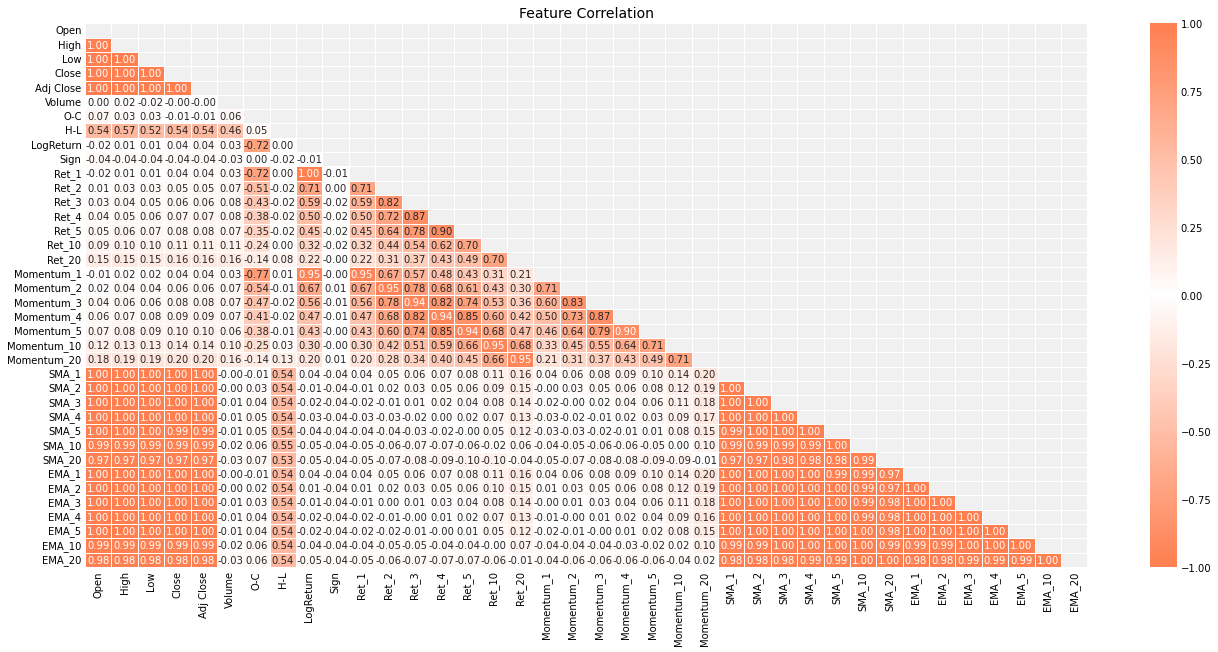

In [16]:
# For some reason it's necessary to run this twice, else it is incorrectly formatted
print_correlation_plot(tickerdata)



Here, correlation are shown in shades of orange: this reflects both correlation and anticorrelation.  Whiter cells represent very low correlations.

Interrogating this matrix we can conclude that, sadly, there are no features that show a good level of correlation with the dependent variable Sign - correlations range between -0.04 and +0.06  

- The most correlated values are ```SMA``` and ```EMA```, as well as ```Open```, ```Close```, ```High```, ```Low``` and ```Adjusted Close```.  Note, however that features ```Open```, ```Close```, ```High``` and ```Low``` are all very strongly correlated *with each other*.  Similarly, ```EMA``` and ```SMA``` values are closely correlated to similar calculations - so ```SMA_1``` and ```SMA_3``` are closely correlated, as one would expect.

- ```Momentum_1```, ```Momentum_5``` and ```_10```, and ```O-C``` show very little correlation.  Some correlation can be seen with ```Momentum_2```, ```_3```, ```_4``` and ```_20``` however.

- ```H-L```, lagged returns of around 3-10 days and ```Volume``` show slight correlation.

Conclusions:

If we were to use this approach, I would suggest dropping the following features, as they have very little predictive power:
- Open, Close, High and Adjusted Close, Momentum_1, Momentum_5 and Momentum_10, O-C, Ret_2 and Ret_20

The below chart illustrates what the correlations would look like if this were the case.  As you can clearly see, the overall correlation is much lower.

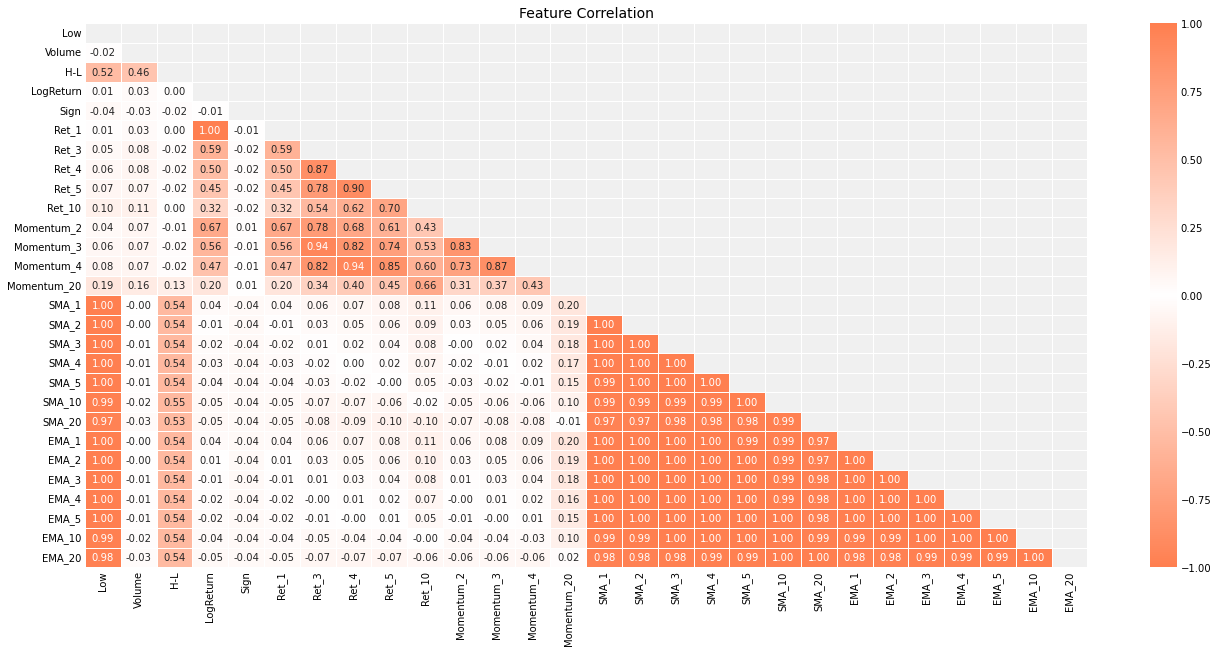

In [17]:
# Note that for the moment we are including the label in the feature data, i.e in X.  
# We will remove this shortly

tmptickerdata = tickerdata.drop([
        'Momentum_1',
        'Momentum_5',
        'Momentum_10',
        'O-C',
        'Ret_2',
        'Ret_20',
        'Open',
        'Close',
        'High',
        'Adj Close'
    ], axis=1)

print_correlation_plot(tmptickerdata)

#### 5.3.2 Feature Selection:  a More Scientific Approach

So far we have used a manual approach for feature selection.  In this section I use some of the offerings in ```scikit-learn``` and ````statsmodels```` to attempt to perform this in a more rigorous way.

1. ```SelectKBest```

I firstly use ````SelectKBest```` to identify the best $k$ features.  In an industrial setting, we should perhaps use the hyperparameter tuning phase to identify the best value of $k$ here - but for the moment we have chosen $k = 27$

We use the default scoring function f_classif, which returns the ANOVA F-value

In [18]:
skb = SelectKBest(f_classif, k = 27)

skb.fit(tickerdata.drop('Sign', axis=1), tickerdata['Sign'])

for f, s in zip(tickerdata.drop('Sign', axis=1).columns, skb.scores_):
    print(f'F-score: {s:0.4} for Feature {f}')

F-score: 2.433 for Feature Open
F-score: 2.295 for Feature High
F-score: 2.318 for Feature Low
F-score: 2.471 for Feature Close
F-score: 2.471 for Feature Adj Close
F-score: 1.175 for Feature Volume
F-score: 0.01613 for Feature O-C
F-score: 0.5027 for Feature H-L
F-score: 0.03918 for Feature LogReturn
F-score: 0.03918 for Feature Ret_1
F-score: 0.008658 for Feature Ret_2
F-score: 0.3916 for Feature Ret_3
F-score: 0.5077 for Feature Ret_4
F-score: 0.5692 for Feature Ret_5
F-score: 0.542 for Feature Ret_10
F-score: 6.417e-05 for Feature Ret_20
F-score: 2.407e-06 for Feature Momentum_1
F-score: 0.1274 for Feature Momentum_2
F-score: 0.1062 for Feature Momentum_3
F-score: 0.05349 for Feature Momentum_4
F-score: 0.02697 for Feature Momentum_5
F-score: 0.03247 for Feature Momentum_10
F-score: 0.03712 for Feature Momentum_20
F-score: 2.471 for Feature SMA_1
F-score: 2.476 for Feature SMA_2
F-score: 2.529 for Feature SMA_3
F-score: 2.477 for Feature SMA_4
F-score: 2.453 for Feature SMA_5
F-sco

As may be expected for a process that is formally assumed to be both Markovian and a martingale, the predictive powers of most of these features is comparatively low, as is shown by low-ish F-scores.

We subsequently use the ```get_support()``` function to present which features (in order) are considered to be the k 'best' features.  Subsequently, we restrict the feature dataset to only those columns:

In [19]:
skb.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True, False,
       False, False,  True,  True,  True,  True, False, False,  True,
        True, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [20]:
mask = skb.get_support()
new_features = tickerdata.drop('Sign', axis=1).columns[mask]

# restrict the feature set to only those predicted by SelectKBest
jim = tickerdata[new_features]
jim.head()

,Open,High,Low,Close,Adj Close,Volume,H-L,Ret_3,Ret_4,Ret_5,Ret_10,Momentum_2,Momentum_3,SMA_1,SMA_2,SMA_3,SMA_4,SMA_5,SMA_10,SMA_20,EMA_1,EMA_2,EMA_3,EMA_4,EMA_5,EMA_10,EMA_20
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-02-01,17.840000,17.920000,17.100000,17.240000,17.240000,21200991,0.820000,0.039638,0.025258,0.030029,0.007569,0.299999,0.670000,17.240000,34.860001,51.800001,68.370001,85.180000,168.410002,340.400002,17.240000,17.279806,17.224287,17.164619,17.115796,17.007577,16.980888
2017-02-02,17.330000,17.860001,17.120001,17.780001,17.780001,19406592,0.740000,0.048397,0.070480,0.056100,0.057291,0.160000,0.840000,17.780001,35.020000,52.640001,69.580002,86.150002,169.400002,341.320002,17.780001,17.613269,17.502144,17.410775,17.337227,17.149737,17.066458
2017-02-03,17.719999,17.850000,17.440001,17.610001,17.610001,14406949,0.410000,-0.000568,0.038789,0.060873,0.060270,0.370001,-0.010000,17.610001,35.390001,52.630001,70.250002,87.190002,170.430002,341.840002,17.610001,17.611090,17.556072,17.490466,17.428160,17.234258,17.123980
2017-02-06,17.700001,17.969999,17.410000,17.930000,17.930000,13206312,0.559999,0.039243,0.017441,0.056798,0.076470,0.150000,0.690001,17.930000,35.540001,53.320002,70.560001,88.180002,171.750002,342.600002,17.930000,17.823697,17.743036,17.666280,17.595450,17.361790,17.208386
2017-02-07,18.000000,18.670000,17.990000,18.260000,18.260000,26814812,0.680000,0.026639,0.057481,0.035678,0.100141,0.650000,0.480000,18.260000,36.190001,53.800001,71.580002,88.820002,173.490002,343.360003,18.260000,18.114566,18.001518,17.903769,17.816975,17.526190,17.317475


2. ```VIF```

Finally, we attempt to use Variance Inflation Factor to attempt to quantify multicollinearity in the data.  Multicollinearity is when two or more variables are closely correlated with each other.  This is more often used in a regression setting, but we attempt here to apply it to a classification setting.

It is largely accepted that features with a VIF value of grater than 5 or 10 should be ignored.  Here, the VIF model predicts that only one or two of the available features are within this range.

In summary: VIF proves to be un-usable in this context.

In [21]:
def vif(X):
    logme('Computing Variance Inflation Factor for feature set X')
    scaler = StandardScaler()
    xs = scaler.fit_transform(X)

    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(xs, i) for i in range(xs.shape[1])]

    return vif

vif(tickerdata.drop('Sign', axis=1))


***  Computing Variance Inflation Factor for feature set X


,Feature,VIF
0,Open,inf
1,High,inf
2,Low,inf
3,Close,inf
4,Adj Close,inf
5,Volume,1.538099e+00
6,O-C,inf
7,H-L,inf
8,LogReturn,inf
9,Ret_1,inf


3. Performance Limitations: ```RFE```, ```RFECV ```& ````Shap````

Note that ```RFE``` and ```RFECV``` were also attempted - however due to the computational complexity, it was impossible to get any results on a standard desktop PC when using an SVC model, even when run overnight.  This is a known limitation with RFE-style algorithms.  ```Shap```, similarly, took an impossible amount of time to complete so was removed from this paper.

**5.3.3 Feature Selection:  Conclusions**

I find that ```SelectKBest``` is largely consistent with my observations (with a small number of notable differences) from interrogating the correlations manually.  

We will now progress to training the model, using the feature set to those computed by ````SelectKBest````

In [22]:
clf = CQFClassifier(tickerdata[new_features], tickerdata['Sign'], 0.20)

***  Populated full size feature and label sets.  Shapes: 
X:		(1445, 27), 
y:		(1445,)
***  Created training & testing datasets.  Shapes of the dataframes are:
X_train:	(1156, 27)
X_test:		(289, 27)
y_train:	(1156,)
y_test:		(289,)


In [23]:
clf.X.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'H-L', 'Ret_3',
       'Ret_4', 'Ret_5', 'Ret_10', 'Momentum_2', 'Momentum_3', 'SMA_1',
       'SMA_2', 'SMA_3', 'SMA_4', 'SMA_5', 'SMA_10', 'SMA_20', 'EMA_1',
       'EMA_2', 'EMA_3', 'EMA_4', 'EMA_5', 'EMA_10', 'EMA_20'],
      dtype='object')

#### <center>6. Choose and Train the Model

We have been directed to use Support Vector Machines as part of the problem statement.  I'm interpreting this to also allow Maximal Margin Classifier and Hard Margin.

To minimise data leakage, the data has already been split in to an 80:20 ratio when we instantiated the ````CQFClassifier```` object

In [24]:
# We have already created our CQFClassifier object.  Let's remind ourselves of what the data is:
logme(f'CQFClassifier details: {clf}')

***  CQFClassifier details: Classifier <class '__main__.CQFClassifier'>

Feature set size: 		(1445, 27)
Label set size: 		(1445,)
Label set size: 		0.2

X_train: 			(1156, 27)
X_test: 			(289, 27)
y_train: 			(1156,)
y_test: 			(289,)
Feature column list: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'H-L', 'Ret_3',
       'Ret_4', 'Ret_5', 'Ret_10', 'Momentum_2', 'Momentum_3', 'SMA_1',
       'SMA_2', 'SMA_3', 'SMA_4', 'SMA_5', 'SMA_10', 'SMA_20', 'EMA_1',
       'EMA_2', 'EMA_3', 'EMA_4', 'EMA_5', 'EMA_10', 'EMA_20'],
      dtype='object')


We now train the model, for the moment using nothing more than a MinMaxScaler and an SVC with default parameters.  Note that as highlighted earlier, we have already dropped rows with empty values, so are omitting the use of an ````Imputer```` for the moment.  In an industrial implementation where you can't always rely on inbound data quality, it would make sense to include an imputing step - but for this model it is unnecessary

I have opted for use of the ```MinMaxScaler``` as opposed to ````StandardScaler```` due to the presence of a small number of outliers, such as the volume spike on 27 Oct 2022.

In [25]:
# Note that as highlighted earlier, empty values have been dropped from the data set
# Therefore I have opted to omit the Imputation step as not necessary.

pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', SVC(probability=True))
])

pipe

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', SVC(probability=True))])

We now fit the model, and use that to predict the labels associated with the testing data set, ```X_test```

This procedure returns a set of predictions, and the (now fitted) Pipeline.

In [26]:
y_pred, pipe = clf.fit_predict(pipe)

***  Fitting model using X_train and y_train...
***  Predicting using X_test


#### <center>7 Evaluate & Tune the Model

We now move on to evaluate the fit of the model.  Evaluating a ML classifier is a nuanced and complex topic (which will be addressed shortly) but in order to quickly characterise quality of fit in a single number, I have chosen to use ```accuracy_score()```

While it is understood that ```accuracy_score()``` can be a misleading metric, particularly on skewed datasets, it is useful in the training context to give us a quick indicator on if we are going in the right direction, or not.  Shorly, we will provide a more thorough evaluation of the suitability of the model using ROC AUC, Confusion Matrix data and the Classification Report.

Subsequently, when we perform hyperparameter tuning based on optimising the F1 score, it's possible that the ````accuracy_score```` will in fact go down, not up.

In [27]:
# Output prediction score
acc_train, acc_test = clf.get_metrics(pipe, y_pred)

***  Evaluating training & testing metrics for pipeline: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', SVC(probability=True))])
***  Scores:
Training score:		0.5502
Testing score:		0.5156


As expected, at our first iteration, the model is slightly over-fit, with a 55% training score and 51% for testing.

Our next steps will be to look at some other dimensions:  ````predict_proba()````, ROC/AUC, Confusion Matrix and Classification Report

#### 7.1 ```predict_proba``` and its uses

We firstly look at the output of the pipe's ```predict_proba()``` method - this shows the probabilities calculated by the model instead of the actual prediction.  While it is not strictly within the scope of this paper, it provides additional insight in to the behaviour of the model.

Depending on the level of risk-taking an investor was willing to take, we could potentially use this to give us finer control over the decision-making process.  A bullish / risk-taking investor could perhaps invest whenever the prediction probability is greater than 30% whereas a risk-averse investor could restrict investments to days when the prediction probability is evaluated to be greater than 80%.  For the remainder of this paper, we retain the default threshold of 50%

This could also be of use in defining a trading strategy.  Does the model predict a 51% probability of an up move?  Invest, but a smaller amount.  If the model predicts a very strong probability of an up move, we could use that as a trigger to invest larger amounts

In [28]:
# predict_proba() output:
probs = pipe.predict_proba(clf.X_test)
pd.DataFrame(probs).head()

,0,1
0,0.500000,0.500000
1,0.500000,0.500000
2,0.500000,0.500000
3,0.505192,0.494808
4,0.500000,0.500000


#### 7.2 The ROC curve, and AUC metric

We now move on to evaluate Receiver Operator Characteristic (ROC) curve and the associated Area Under Curve (AUC).  

As is clear from the below ROC curve, our model is slightly out-performing a random choice.  This is confirmed by an AUC value of 0.55

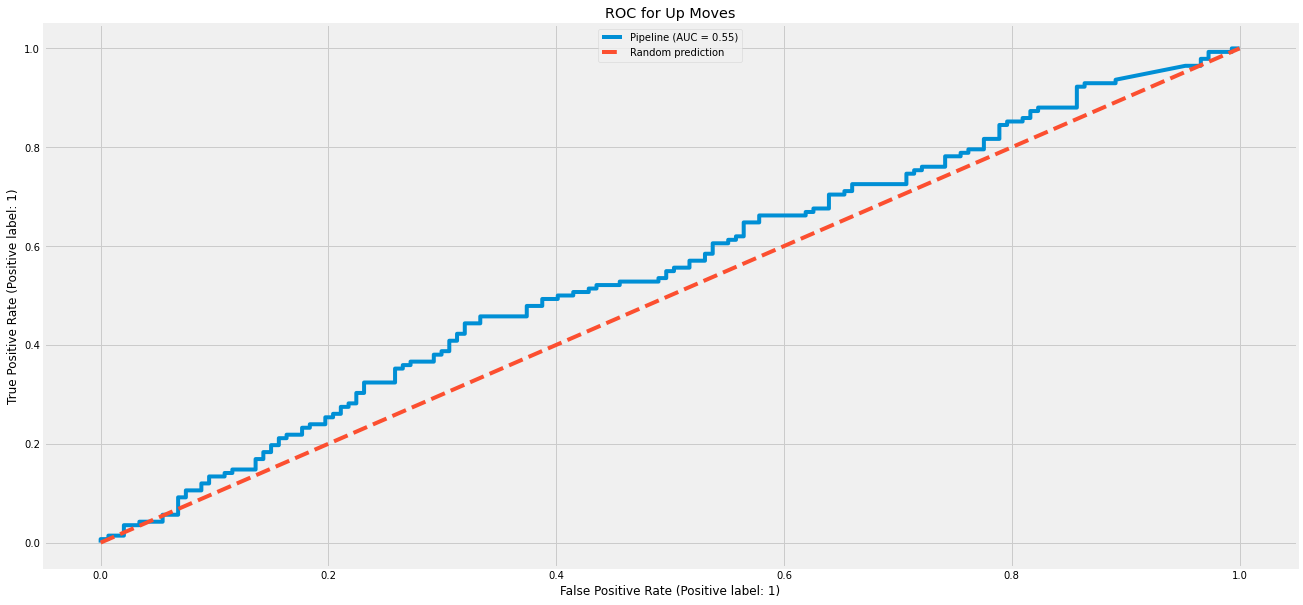

In [29]:
clf.print_roc_curve(pipe)

#### 7.3 Confusion Matrix

We now present the model's confusion matrix

21 126 14 128


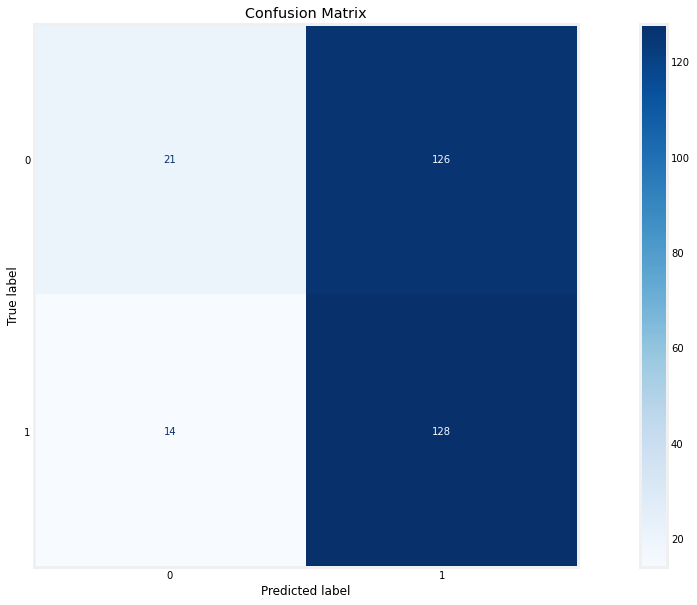

In [30]:
# Confusion Matrix for binary classification
tn, fp, fn, tp = confusion_matrix(clf.y_test, y_pred).ravel()
print(tn, fp, fn, tp)

# Plot confusion matrix
plot_confusion_matrix(pipe, clf.X_test, clf.y_test, cmap='Blues', values_format='.4g')
plt.title('Confusion Matrix')
plt.grid(False)

#### 7.4 Classification Report

Lastly, we move on to the classification report.  

Here, my key priorities will be to focus on the F1 score for the +1 class, as well as the best possible recall & precision

In [31]:
print(classification_report(clf.y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.14      0.23       147
           1       0.50      0.90      0.65       142

    accuracy                           0.52       289
   macro avg       0.55      0.52      0.44       289
weighted avg       0.55      0.52      0.44       289



**7.5 Evaluation of this model**

Here, I evaluate the key metrics of this model.  

As discussed previously my priority is to maximise F1 for the Positive (1) class, but also to include evaluation of the Confusion Matrix and overall shape of the ROC CUrve

- Training score:		0.5502

- Testing score:		0.5156

- AUC:                  0.55

- The ROC Curve presents that the model is slightly outperforming a random choice. 

- The Confusion Matrix confirms that when the true label is positive, it is correct 128 out of 142 times.  When the true label is Negative, it is incorrect 126 out of 147 times.

- For the Positive (1) class:
    - Precision:          0.50

    - Recall:             0.90

    - F1:                 0.65

#### 7.6 Hyperparameter tuning

We now progress to hyperparameter tuning to see if we can optimise the model performance.  Here, I will use ```TimeSeriesSplit```, as usage of many other cross-validation algorithms on timeseries data can lead to loss of information, by breaking the chronological nature of the series.

7.6.1 ````GridSearchCV````

I'm going to use ```GridSearchCV``` to traverse the parameter space.  ````RandomSearchCV```` would also be an option - but isn't strictly necessary as we have a comparatively small data set and no urgent time constraints

In [32]:
tscv = TimeSeriesSplit(n_splits=5)

i = 0

for train, test in tscv.split(clf.X):
    i+=1
    print(f'Split {i}:  Training set from {train[0]} to {train[-1]} - - - -  Test Set from {test[0]} to {test[-1]}')

Split 1:  Training set from 0 to 244 - - - -  Test Set from 245 to 484
Split 2:  Training set from 0 to 484 - - - -  Test Set from 485 to 724
Split 3:  Training set from 0 to 724 - - - -  Test Set from 725 to 964
Split 4:  Training set from 0 to 964 - - - -  Test Set from 965 to 1204
Split 5:  Training set from 0 to 1204 - - - -  Test Set from 1205 to 1444


In [33]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()), ('classifier', SVC(probability=True))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'classifier': SVC(probability=True),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'classifier__C': 1.0,
 'classifier__break_ties': False,
 'classifier__cache_size': 200,
 'classifier__class_weight': None,
 'classifier__coef0': 0.0,
 'classifier__decision_function_shape': 'ovr',
 'classifier__degree': 3,
 'classifier__gamma': 'scale',
 'classifier__kernel': 'rbf',
 'classifier__max_iter': -1,
 'classifier__probability': True,
 'classifier__random_state': None,
 'classifier__shrinking': True,
 'classifier__tol': 0.001,
 'classifier__verbose': False}

For this exercise I'm going to use all the available Kernels (rbf, polynomial, linear, sigmoid), a comparatively wide range of C, ````coef0```` and $\gamma$, and polynomials of degree 1, 2 and 3

To minimise computing time, I am scaling C, $\gamma$, ````coef0```` and degree on an exponential scale, but jumping by a factor $10^2$ - $10^4$ at each step, allowing me to maximise the range of available coefficients.

I am also optimising for F1.  In a subsequent section, I perform the same analysis, but optimising for AUC instead.

**A note on parameter combinations for SVM kernels**

Each of the choices available to the SVM kernel (```rbf```, ```linear```, ```sigmoid```, ```polynomial```) expects a different set of parameters:  for instance, a Gaussian RBF kernel requires $\gamma$, which is of no relevance for a polynomial kernel.  

In this exercise, I am creating a gridsearch parameter space where some kernels will be tested with parameter types that are not relevant for the kernel type (for instance, Gaussian RBF kernel with a ````degree```` parameter).  I have been assured by the documentation that ````GridSearchCV```` is optimised for this eventuality, and will ignore any irrelevant combinations

In [34]:
param_grid = {
    'classifier__kernel':   ['rbf', 'sigmoid', 'linear','polynomial'],
    'classifier__C':        [0, 1e-7, 1e-3, 1, 1e-1, 1e1],
    'classifier__gamma':    ['scale', 1e-3, 1e-1, 1e1, 1e3, 1e5],
    'classifier__coef0':    [0, 1e-7, 1e-3, 1e-1],
    'classifier__degree':   [1, 2, 3]
}

In [35]:
gs = GridSearchCV(pipe, param_grid, n_jobs = -1, cv = tscv, verbose=1, scoring='f1')
gs.fit(clf.X_train, clf.y_train)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('classifier', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0, 1e-07, 0.001, 1, 0.1, 10.0],
                         'classifier__coef0': [0, 1e-07, 0.001, 0.1],
                         'classifier__degree': [1, 2, 3],
                         'classifier__gamma': ['scale', 0.001, 0.1, 10.0,
                                               1000.0, 100000.0],
                         'classifier__kernel': ['rbf', 'sigmoid', 'linear',
                                                'polynomial']},
             scoring='f1', verbose=1)

In [36]:
bestparams = gs.best_params_
logme(f'GridSearchCV has found the following set of best parameters: \n{bestparams}')

# Grab each parameter of interest - we'll be using these shortly
bpc = bestparams['classifier__C']
bpdegree = bestparams['classifier__degree']
bpgamma = bestparams['classifier__gamma']
bpkernel = bestparams['classifier__kernel']
bpcoef0 = bestparams['classifier__coef0']

logme(f'Best parameters:\n\tkernel: {bpkernel}, \n\tc: {bpc}, \n\tdegree: {bpdegree}, \n\tgamma: {bpgamma},  \n\tcoef0: {bpcoef0}')

logme(f'Best Estimator is: {gs.best_estimator_}')

***  GridSearchCV has found the following set of best parameters: 
{'classifier__C': 1e-07, 'classifier__coef0': 0, 'classifier__degree': 1, 'classifier__gamma': 1000.0, 'classifier__kernel': 'rbf'}
***  Best parameters:
	kernel: rbf, 
	c: 1e-07, 
	degree: 1, 
	gamma: 1000.0,  
	coef0: 0
***  Best Estimator is: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier',
                 SVC(C=1e-07, coef0=0, degree=1, gamma=1000.0,
                     probability=True))])


In [37]:
gs.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier',
                 SVC(C=1e-07, coef0=0, degree=1, gamma=1000.0,
                     probability=True))])

Now, using the parameters identified by ```GridSearchCV```, we now re-evaluate the model:

In [38]:

# Annoyingly, there's no single constructor where we can easily create
# SVMs of differing types with one command.

mysvc = SVC()

if (bpkernel == 'rbf'):
    mysvc = SVC(kernel=bpkernel, gamma=bpgamma, C = bpc, coef0=bpcoef0, probability=True)
elif (bpkernel == 'linear'):
    mysvc = SVC(kernel=bpkernel, C = bpc, coef0=bpcoef0, probability=True)
elif (bpkernel == 'sigmoid'):
    mysvc = SVC(kernel=bpkernel, C = bpc, coef0=bpcoef0, gamma = bpgamma, probability=True)
elif (bpkernel == 'polynomial'):
    mysvc = SVC(kernel=bpkernel, degree=bpdegree, C = bpc, coef0=bpcoef0, probability=True)

logme(f'Best estimator as follows: {mysvc}, kernel is {bpkernel}')

pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', mysvc)
])

y_pred, pipe = clf.fit_predict(pipe)

acc_train, acc_test = clf.get_metrics(pipe, y_pred)


***  Best estimator as follows: SVC(C=1e-07, coef0=0, gamma=1000.0, probability=True), kernel is rbf
***  Fitting model using X_train and y_train...
***  Predicting using X_test
***  Evaluating training & testing metrics for pipeline: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier',
                 SVC(C=1e-07, coef0=0, gamma=1000.0, probability=True))])
***  Scores:
Training score:		0.532
Testing score:		0.4913


Let's look at the ROC & AUC:

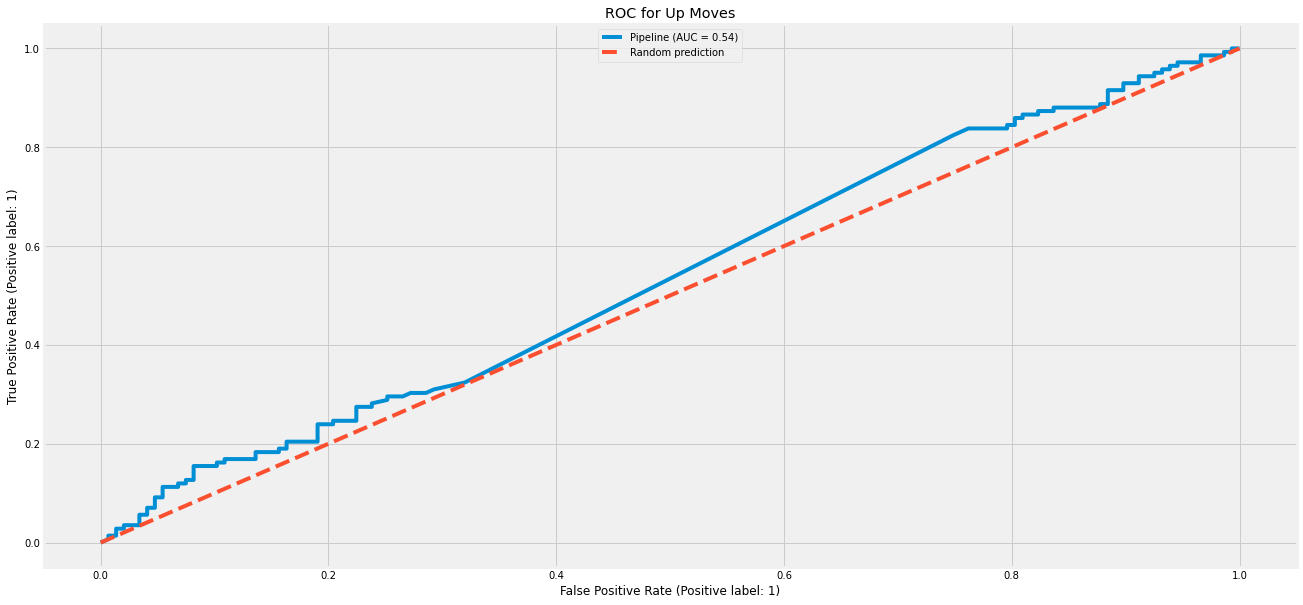

In [39]:
clf.print_roc_curve(pipe)

And now the confusion matrix:

0 147 0 142


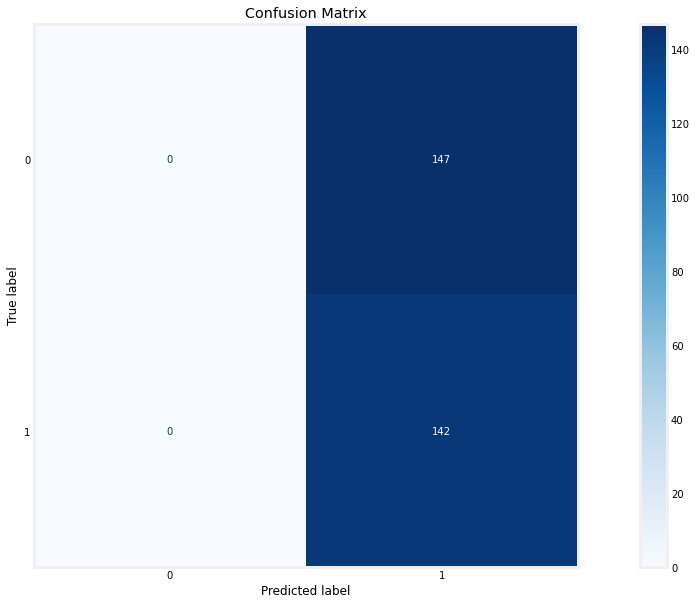

In [40]:
# Confusion Matrix for binary classification
tn, fp, fn, tp = confusion_matrix(clf.y_test, y_pred).ravel()
print(tn, fp, fn, tp)

# Plot confusion matrix
plot_confusion_matrix(pipe, clf.X_test, clf.y_test, cmap='Blues', values_format='.4g')
plt.title('Confusion Matrix')
plt.grid(False)

And finally the classification report

In [41]:
print(classification_report(clf.y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       147
           1       0.49      1.00      0.66       142

    accuracy                           0.49       289
   macro avg       0.25      0.50      0.33       289
weighted avg       0.24      0.49      0.32       289



**7.6.2 Evaluation of this model**

Here, I evaluate the key metrics of this model.  

My priority is to maximise F1 for the Positive (1) class, but also to include evaluation of the Confusion Matrix and overall shape of the ROC CUrve

- Training score:		0.532

- Testing score:		0.4913

- AUC:                  0.54

- The ROC Curve presents that the model is slightly outperforming a random choice. 

- The Confusion Matrix confirms that when the true label is positive, it is correct 100% of the time.  However when the true label is Negative, it is always incorrect.  This would likely be a significant issue for a model attempting to model both up and down moves - but in this case we are more interested in the up moves only for the moment.

- For the Positive (1) class:
    - Precision:          0.49

    - Recall:             1.00

    - F1:                 0.66

**7.6.3 RandomizedSearchCV**

Can ````RandomizedSearchCV```` identify a superior model?  Let's see

In [45]:
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', SVC(probability=True))
])

random_search = RandomizedSearchCV(pipe, param_grid, n_iter=3000, \
    scoring='f1', n_jobs=-1, cv=tscv, random_state=42, verbose=1)
random_search.fit(clf.X_train, clf.y_train)

y_pred, pipe = clf.fit_predict(pipe)

acc_train, acc_test = clf.get_metrics(pipe, y_pred)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
***  Fitting model using X_train and y_train...
***  Predicting using X_test
***  Evaluating training & testing metrics for pipeline: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', SVC(probability=True))])
***  Scores:
Training score:		0.5502
Testing score:		0.5156


In [46]:
bestparams = random_search.best_params_
logme(f'RandomizedSearchCV has found the following set of best parameters: \n{bestparams}')

# Grab each parameter of interest - we'll be using these shortly
bpc = bestparams['classifier__C']
bpdegree = bestparams['classifier__degree']
bpgamma = bestparams['classifier__gamma']
bpkernel = bestparams['classifier__kernel']
bpcoef0 = bestparams['classifier__coef0']

print(f'Best parameters:\n\tkernel: {bpkernel}, \n\tc: {bpc}, \
    \n\tdegree: {bpdegree}, \n\tgamma: {bpgamma},  \n\tcoef0: {bpcoef0}')

logme(f'Best score is: {random_search.best_score_}')
logme(f'Best Estimator is: {random_search.best_estimator_}')

***  RandomizedSearchCV has found the following set of best parameters: 
{'classifier__kernel': 'rbf', 'classifier__gamma': 1000.0, 'classifier__degree': 1, 'classifier__coef0': 0, 'classifier__C': 1e-07}
Best parameters:
	kernel: rbf, 
	c: 1e-07,     
	degree: 1, 
	gamma: 1000.0,  
	coef0: 0
***  Best score is: 0.699778535086601
***  Best Estimator is: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier',
                 SVC(C=1e-07, coef0=0, degree=1, gamma=1000.0,
                     probability=True))])


In [47]:

# Annoyingly, there's no single constructor where we can easily create
# SVMs of differing types with one command.

mysvc = SVC()

if (bpkernel == 'rbf'):
    mysvc = SVC(kernel=bpkernel, gamma=bpgamma, C = bpc, coef0=bpcoef0, probability=True)
elif (bpkernel == 'linear'):
    mysvc = SVC(kernel=bpkernel, C = bpc, coef0=bpcoef0, probability=True)
elif (bpkernel == 'sigmoid'):
    mysvc = SVC(kernel=bpkernel, C = bpc, coef0=bpcoef0, gamma = bpgamma, probability=True)
elif (bpkernel == 'polynomial'):
    mysvc = SVC(kernel=bpkernel, degree=bpdegree, C = bpc, coef0=bpcoef0, probability=True)

logme(f'Best estimator as follows: {mysvc}, kernel is {bpkernel}')

pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', mysvc)
])

y_pred, pipe = clf.fit_predict(pipe)

acc_train, acc_test = clf.get_metrics(pipe, y_pred)

***  Best estimator as follows: SVC(C=1e-07, coef0=0, gamma=1000.0, probability=True), kernel is rbf
***  Fitting model using X_train and y_train...
***  Predicting using X_test
***  Evaluating training & testing metrics for pipeline: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier',
                 SVC(C=1e-07, coef0=0, gamma=1000.0, probability=True))])
***  Scores:
Training score:		0.532
Testing score:		0.4913


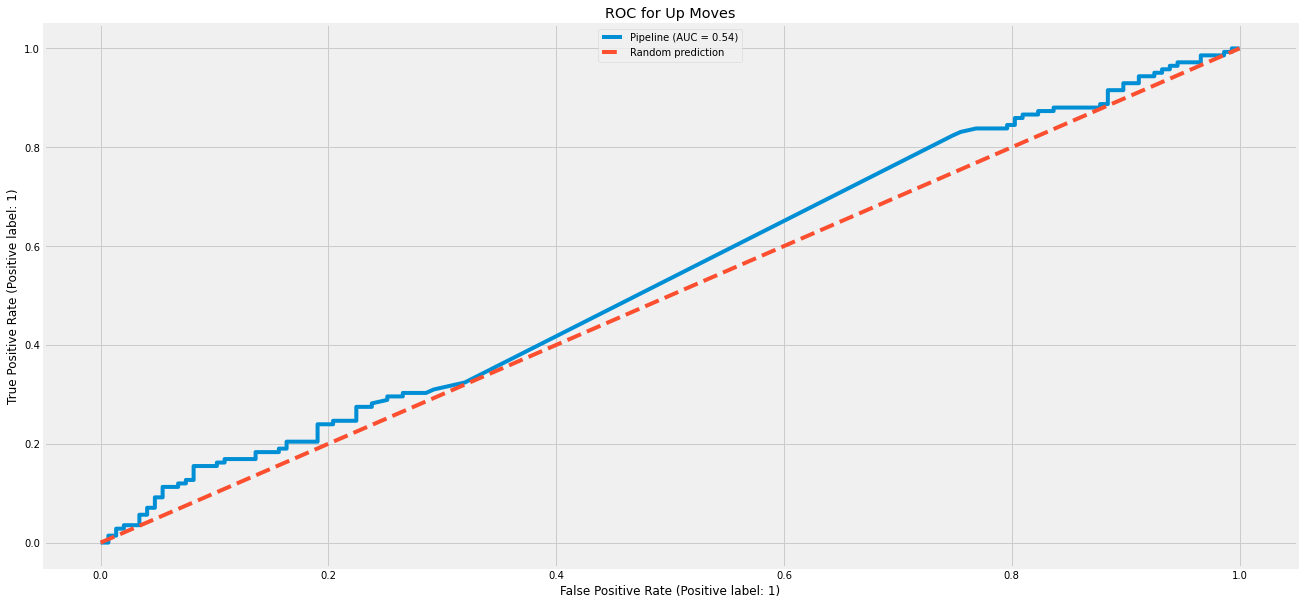

In [48]:
clf.print_roc_curve(pipe)

0 147 0 142


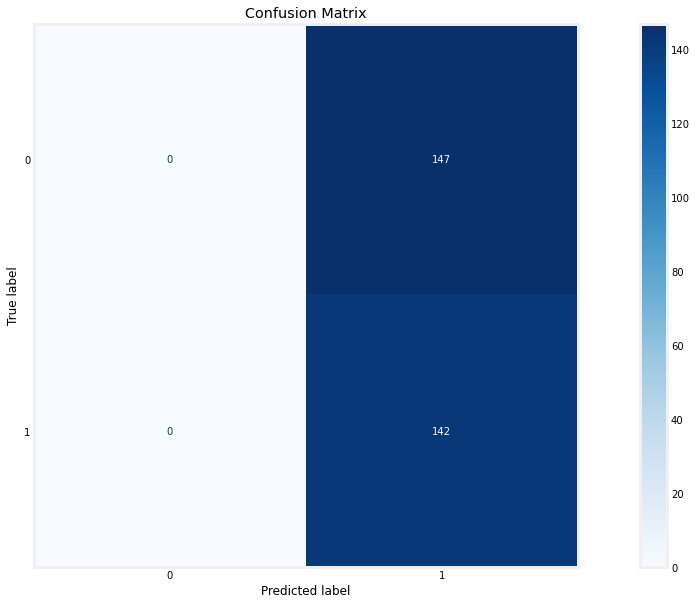

In [49]:
# Confusion Matrix for binary classification
tn, fp, fn, tp = confusion_matrix(clf.y_test, y_pred).ravel()
print(tn, fp, fn, tp)

# Plot confusion matrix
plot_confusion_matrix(pipe, clf.X_test, clf.y_test, cmap='Blues', values_format='.4g')
plt.title('Confusion Matrix')
plt.grid(False)

In [50]:
print(classification_report(clf.y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       147
           1       0.49      1.00      0.66       142

    accuracy                           0.49       289
   macro avg       0.25      0.50      0.33       289
weighted avg       0.24      0.49      0.32       289



**7.6.4 Evaluation of this model**

````RandomizedSearchCV```` has identified the same model as ````GridSearchCV```` - as such, the performance metrics are the same

**7.6.5  ````RandomizedSearchCV````:  Optimising AUC**

Finally, I re-execute a similar analysis to previously - except in this scenario my aim is to maximise AUC (which is in many ways a more balanced metric) rather than F1.

In [52]:
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', SVC(probability=True))
])

random_search = RandomizedSearchCV(pipe, param_grid, n_iter=3000, \
    scoring='roc_auc', n_jobs=-1, cv=tscv, random_state=42, verbose=1)
random_search.fit(clf.X_train, clf.y_train)

y_pred, pipe = clf.fit_predict(pipe)

acc_train, acc_test = clf.get_metrics(pipe, y_pred)

bestparams = random_search.best_params_
logme(f'RandomizedSearchCV has found the following set of best parameters: \n{bestparams}')

# Grab each parameter of interest - we'll be using these shortly
bpc = bestparams['classifier__C']
bpdegree = bestparams['classifier__degree']
bpgamma = bestparams['classifier__gamma']
bpkernel = bestparams['classifier__kernel']
bpcoef0 = bestparams['classifier__coef0']

print(f'Best parameters:\n\tkernel: {bpkernel}, \n\tc: {bpc}, \
    \n\tdegree: {bpdegree}, \n\tgamma: {bpgamma},  \n\tcoef0: {bpcoef0}')

logme(f'Best Estimator is: {random_search.best_estimator_}')


Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
***  Fitting model using X_train and y_train...
***  Predicting using X_test
***  Evaluating training & testing metrics for pipeline: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', SVC(probability=True))])
***  Scores:
Training score:		0.5502
Testing score:		0.5156
***  RandomizedSearchCV has found the following set of best parameters: 
{'classifier__kernel': 'rbf', 'classifier__gamma': 0.001, 'classifier__degree': 1, 'classifier__coef0': 0, 'classifier__C': 0.1}
Best parameters:
	kernel: rbf, 
	c: 0.1,     
	degree: 1, 
	gamma: 0.001,  
	coef0: 0
***  Best Estimator is: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier',
                 SVC(C=0.1, coef0=0, degree=1, gamma=0.001, probability=True))])


***  Best estimator as follows: SVC(C=0.1, coef0=0, gamma=0.001, probability=True), kernel is rbf
***  Fitting model using X_train and y_train...
***  Predicting using X_test
***  Evaluating training & testing metrics for pipeline: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier',
                 SVC(C=0.1, coef0=0, gamma=0.001, probability=True))])
***  Scores:
Training score:		0.532
Testing score:		0.4913


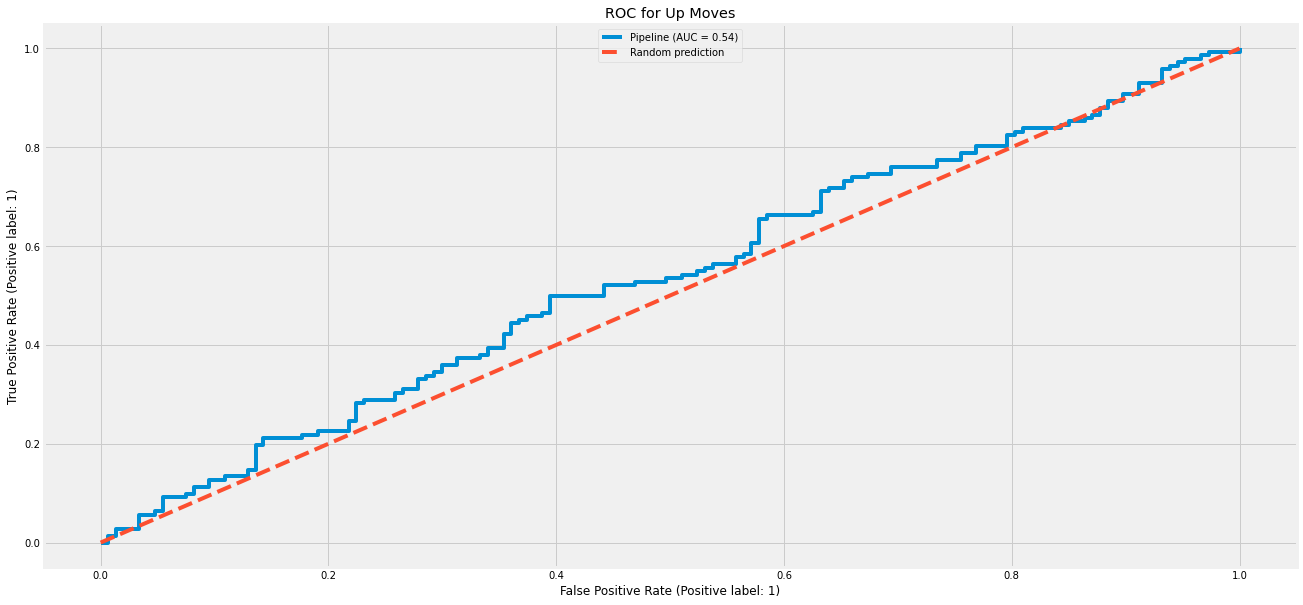

In [53]:
# Annoyingly, there's no single constructor where we can easily create
# SVMs of differing types with one command.

mysvc = SVC()

if (bpkernel == 'rbf'):
    mysvc = SVC(kernel=bpkernel, gamma=bpgamma, C = bpc, coef0=bpcoef0, probability=True)
elif (bpkernel == 'linear'):
    mysvc = SVC(kernel=bpkernel, C = bpc, coef0=bpcoef0, probability=True)
elif (bpkernel == 'sigmoid'):
    mysvc = SVC(kernel=bpkernel, C = bpc, coef0=bpcoef0, gamma = bpgamma, probability=True)
elif (bpkernel == 'polynomial'):
    mysvc = SVC(kernel=bpkernel, degree=bpdegree, C = bpc, coef0=bpcoef0, probability=True)

logme(f'Best estimator as follows: {mysvc}, kernel is {bpkernel}')

pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', mysvc)
])

y_pred, pipe = clf.fit_predict(pipe)

acc_train, acc_test = clf.get_metrics(pipe, y_pred)

clf.print_roc_curve(pipe)

0 147 0 142


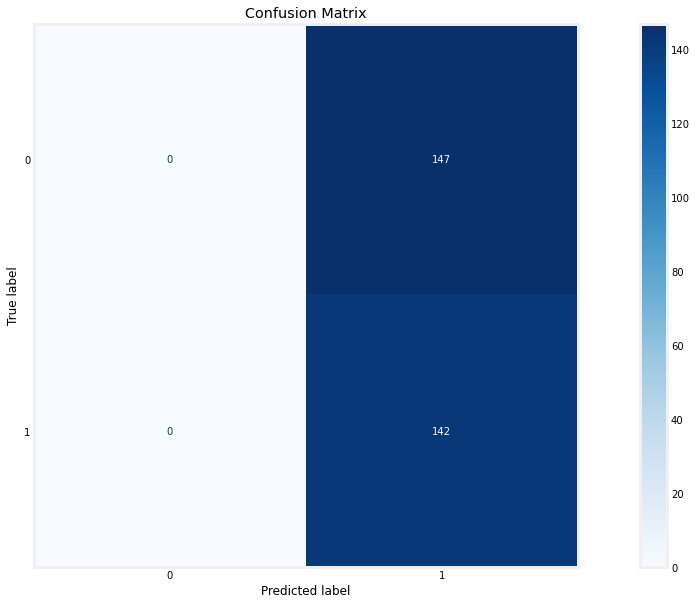

In [54]:
# Confusion Matrix for binary classification
tn, fp, fn, tp = confusion_matrix(clf.y_test, y_pred).ravel()
print(tn, fp, fn, tp)

# Plot confusion matrix
plot_confusion_matrix(pipe, clf.X_test, clf.y_test, cmap='Blues', values_format='.4g')
plt.title('Confusion Matrix')
plt.grid(False)

In [55]:
print(classification_report(clf.y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       147
           1       0.49      1.00      0.66       142

    accuracy                           0.49       289
   macro avg       0.25      0.50      0.33       289
weighted avg       0.24      0.49      0.32       289



**7.6.6 Evaluation of of model**

Here, I evaluate the key metrics of this model.  

My priority is to maximise F1 for the Positive (1) class, but also to include evaluation of the Confusion Matrix and overall shape of the ROC CUrve

- Training score:		0.532

- Testing score:		0.4913

- AUC:                  0.54

- The ROC Curve presents that the model is slightly outperforming a random choice. 

- The Confusion Matrix confirms that when the true label is positive, it is correct 100% of the time.  However when the true label is Negative, it is always incorrect.  This would likely be a significant issue for a model attempting to model both up and down moves - but in this case we are more interested in the up moves only for the moment.

- For the Positive (1) class:
    - Precision:          0.49

    - Recall:             1.00

    - F1:                 0.66